In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import datetime as dt

In [3]:
#print("/Accident data/US_Accidents_Dec19.csv")
accidents_source=pd.read_csv("Accident data/US_Accidents_Dec19.csv")


In [4]:
accidents_source.size

145742415

In [5]:
accidents_source.shape

(2974335, 49)

In [6]:
accidents_source.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
accidents_source.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
accidents_source.dtypes


ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [8]:
#accidents_source[["Start Date","Start Time"]]=accidents_source["Start_Time"].str.split(expand=True)

In [9]:
#accidents_source[["End Date","End Time"]]=accidents_source["End_Time"].str.split(expand=True)

In [22]:
target_columns=['Severity','Start_Time','End_Time','Start_Lat', 'Start_Lng','City', 'State',\
                'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',\
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition','Sunrise_Sunset']
accident_target=accidents_source.loc[accidents_source['Start_Time']>='2016-12-01'][target_columns].reset_index(drop=True)
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,100.0,30.09,0.8,Calm,NaN,NaN,NaN,Night
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,90.0,30.13,10.0,WSW,3.5,NaN,Clear,Night
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,90.0,30.11,10.0,ESE,5.8,NaN,Mostly Cloudy,Night
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,83.0,30.11,10.0,Calm,NaN,NaN,Clear,Night
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,82.0,30.07,9.0,Calm,NaN,NaN,Clear,Night


In [23]:
accident_target["Start_Time"]=pd.to_datetime(accident_target["Start_Time"],format='%Y-%m-%d %H:%M:%S.%f')

In [24]:
accident_target["Start_Year"]=accident_target["Start_Time"].dt.year

accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,100.0,30.09,0.8,Calm,NaN,NaN,NaN,Night,2016
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,90.0,30.13,10.0,WSW,3.5,NaN,Clear,Night,2016
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,90.0,30.11,10.0,ESE,5.8,NaN,Mostly Cloudy,Night,2016
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,83.0,30.11,10.0,Calm,NaN,NaN,Clear,Night,2016
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,82.0,30.07,9.0,Calm,NaN,NaN,Clear,Night,2016


In [25]:
#accident_target["Start_Time"].dt.month
accident_target["Season"]=np.select(
    [
        (accident_target["Start_Time"].dt.month== 12) | (accident_target["Start_Time"].dt.month== 1)| (accident_target["Start_Time"].dt.month== 2), 
        (accident_target["Start_Time"].dt.month== 3) | (accident_target["Start_Time"].dt.month== 4)| (accident_target["Start_Time"].dt.month== 5),
        (accident_target["Start_Time"].dt.month== 6) | (accident_target["Start_Time"].dt.month== 7)| (accident_target["Start_Time"].dt.month== 8),
        (accident_target["Start_Time"].dt.month== 9) | (accident_target["Start_Time"].dt.month== 10)| (accident_target["Start_Time"].dt.month== 11)
        
    ], 
    [
        'Winter', 
        'Spring',
        'Summer',
        'Fall'
    ], 
    default='Unknown'
)


In [26]:
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,100.0,30.09,0.8,Calm,NaN,NaN,NaN,Night,2016,Winter
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,90.0,30.13,10.0,WSW,3.5,NaN,Clear,Night,2016,Winter
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,90.0,30.11,10.0,ESE,5.8,NaN,Mostly Cloudy,Night,2016,Winter
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,83.0,30.11,10.0,Calm,NaN,NaN,Clear,Night,2016,Winter
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,82.0,30.07,9.0,Calm,NaN,NaN,Clear,Night,2016,Winter


In [27]:
accident_target.to_csv("TargetData/us_accident_clean.csv")

In [125]:
accident_state_year=pd.DataFrame(accident_target[accident_target["Start_Time"]>='2017-01-01']\
                                 .groupby(["State","Start_Year"])["Start_Time"].count())\
.sort_values("Start_Time",ascending=False).reset_index()
#,columns=["State","Year","Accident Count"])
#.sort_values("Accident Count",ascending=False).reset_index()
accident_state_year.columns=["State","Year","Accident Count"]

#accident_state_year=accident_state_year



accident_state_year[["State","Year","Accident Count"]]

accident_state_year[accident_state_year["State"].isin(['CA'])]

,State,Year,Accident Count
0,CA,2019,213307
1,CA,2018,156777
2,CA,2017,152664


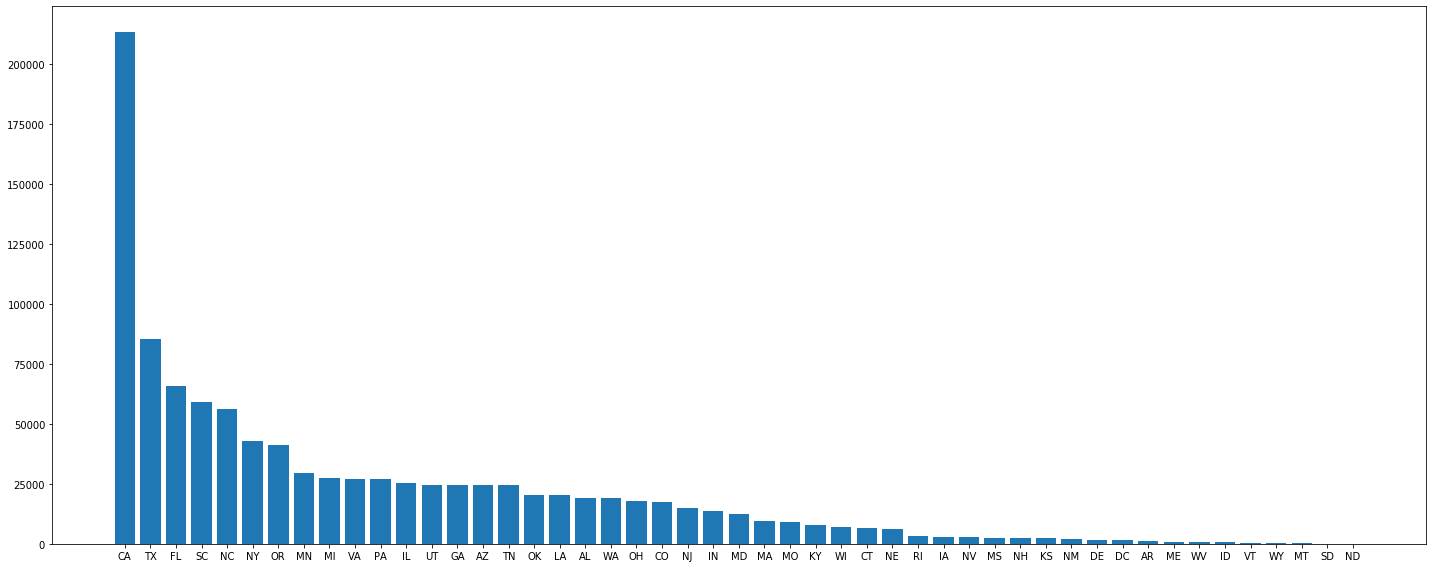

In [127]:
plt.figure(figsize=(20,8))
_=plt.bar(accident_state_year["State"],accident_state_year["Accident Count"])
plt.tight_layout()



#This shows that Califronia 

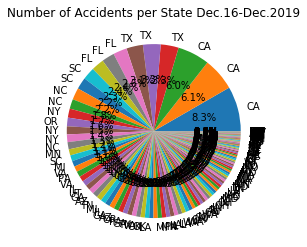

In [129]:
#Presenting the number of accidents per state in a pie chart.
plt.title("Number of Accidents per State Dec.16-Dec.2019")
#explode = (0.1)
plt.pie(accident_state_year["Accident Count"], labels=accident_state_year["State"],autopct="%1.1f%%")
plt.show()



In [18]:
states=[]
states.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nlargest(3).index.values))

states.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nsmallest(3).index.values))

states.append('NY')
print(states)

['CA', 'TX', 'FL', 'ND', 'SD', 'WY', 'NY']


In [19]:
accident_state_year_2017=accident_state_year[(accident_state_year["State"].isin(states)) & (accident_state_year["Year"]==2017)]
accident_state_year_2017


,State,Year,Accident Count
2,CA,2017,152664
3,TX,2017,85542
7,FL,2017,60669
16,NY,2017,36878
139,WY,2017,112
145,SD,2017,12
146,ND,2017,4


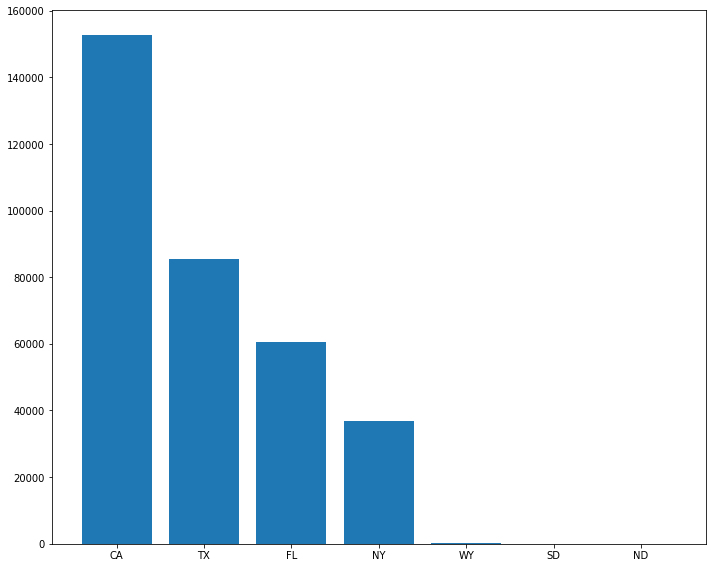

In [20]:
plt.figure(figsize=(10,8))
_=plt.bar(accident_state_year_2017["State"],accident_state_year_2017["Accident Count"])
plt.tight_layout()

# Time Analysis

In [84]:
accident_target.count()

Severity             2623302
Start_Time           2623302
End_Time             2623302
Start_Lat            2623302
Start_Lng            2623302
City                 2623244
State                2623302
Zipcode              2622516
Temperature(F)       2572734
Wind_Chill(F)        1104925
Humidity(%)          2570090
Pressure(in)         2579648
Visibility(mi)       2564745
Wind_Direction       2581129
Wind_Speed(mph)      2248405
Precipitation(in)     947119
Weather_Condition    2564660
Sunrise_Sunset       2623235
Start_Year           2623302
Season               2623302
Start_Month          2623302
Start_Date_Only      2623302
dtype: int64

In [53]:
#Calling the initial data and creating a new dataFrame
accident_target["Start_Year"]=accident_target["Start_Time"].dt.year
accident_target["Start_Month"]=accident_target["Start_Time"].dt.month
accident_target["Start_Date_Only"]=accident_target["Start_Time"].dt.date

In [56]:
accident_target

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,...,0.8,Calm,NaN,NaN,NaN,Night,2016,Winter,12,2016-12-01
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,...,10.0,WSW,3.5,NaN,Clear,Night,2016,Winter,12,2016-12-01
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,...,10.0,ESE,5.8,NaN,Mostly Cloudy,Night,2016,Winter,12,2016-12-01
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,...,10.0,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,...,9.0,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623297,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,Riverside,CA,92501,86.0,86.0,...,10.0,W,13.0,0.0,Fair,Day,2019,Summer,8,2019-08-23
2623298,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,San Diego,CA,92108,70.0,70.0,...,10.0,SW,6.0,0.0,Fair,Day,2019,Summer,8,2019-08-23
2623299,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,Orange,CA,92866,73.0,73.0,...,10.0,SSW,10.0,0.0,Partly Cloudy,Day,2019,Summer,8,2019-08-23
2623300,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,Culver City,CA,90230,71.0,71.0,...,10.0,SW,8.0,0.0,Fair,Day,2019,Summer,8,2019-08-23


In [77]:
#Creating df for each year to evaluate the number of accidents for each month in each year
accidents_2016_df = accident_target.loc[accident_target['Start_Year']==2016].sort_values(by='Start_Month', ascending=True)
accidents_2017_df = accident_target.loc[accident_target['Start_Year']==2017].sort_values(by='Start_Month', ascending=True)
accidents_2018_df = accident_target.loc[accident_target['Start_Year']==2018].sort_values(by='Start_Month', ascending=True)
accidents_2019_df = accident_target.loc[accident_target['Start_Year']==2019].sort_values(by='Start_Month', ascending=True)

accidents_2016_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,...,0.8,Calm,NaN,NaN,NaN,Night,2016,Winter,12,2016-12-01
71865,2,2016-12-02 17:14:20,2016-12-02 17:59:06,47.684433,-117.414986,Spokane,WA,99205-3177,37.0,31.6,...,9.0,SSW,6.9,0.00,Light Rain,Night,2016,Winter,12,2016-12-02
71866,2,2016-12-02 17:23:59,2016-12-02 18:08:33,47.369980,-122.286919,Kent,WA,98032-5654,46.0,40.2,...,3.0,SW,12.7,0.02,Light Rain,Night,2016,Winter,12,2016-12-02
71867,3,2016-12-02 17:37:07,2016-12-02 18:21:41,47.821156,-122.279182,Lynnwood,WA,98036,45.0,37.4,...,6.0,South,18.4,0.01,Light Rain,Night,2016,Winter,12,2016-12-02
71868,3,2016-12-02 17:36:19,2016-12-02 18:20:53,47.580242,-122.174667,Bellevue,WA,98006,46.9,NaN,...,1.8,SE,4.6,0.00,Light Rain,Night,2016,Winter,12,2016-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34859,2,2016-12-25 04:54:35,2016-12-25 05:24:20,41.859398,-88.056114,Glen Ellyn,IL,60137-5900,32.0,24.2,...,4.0,SE,9.2,NaN,Overcast,Night,2016,Winter,12,2016-12-25
34860,2,2016-12-25 10:21:41,2016-12-25 11:06:27,41.905346,-87.988319,Villa Park,IL,60181-1161,33.1,23.9,...,3.0,ESE,12.7,NaN,Overcast,Day,2016,Winter,12,2016-12-25
34861,2,2016-12-25 12:46:40,2016-12-25 13:31:19,42.012993,-88.217590,Elgin,IL,60120,33.1,22.2,...,2.0,ESE,17.3,NaN,Overcast,Day,2016,Winter,12,2016-12-25
34849,2,2016-12-23 19:26:11,2016-12-23 20:10:59,41.924606,-88.120552,Carol Stream,IL,60188,33.1,24.9,...,4.0,South,10.4,0.00,Overcast,Night,2016,Winter,12,2016-12-23


In [87]:
accidents_per_month_2016 = accidents_2016_df.groupby(accidents_2016_df['Start_Month']).count()
accidents_per_month_2017 = accidents_2017_df.groupby(accidents_2017_df['Start_Month']).count()
accidents_per_month_2018 = accidents_2018_df.groupby(accidents_2018_df['Start_Month']).count()
accidents_per_month_2019 = accidents_2019_df.groupby(accidents_2019_df['Start_Month']).count()
accidents_per_month_2019

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Date_Only
Start_Month,,,,,,,,,,,,,,,,,,,,,
1,79275,79275,79275,79275,79275,79274,79275,79259,77890,37198,...,78037,77675,78402,63039,13653,77572,79274,79275,79275,79275
2,74556,74556,74556,74556,74556,74554,74556,74530,73458,34181,...,73636,73113,73867,60960,18946,73105,74553,74556,74556,74556
3,69396,69396,69396,69396,69396,69395,69396,69370,68382,22671,...,68546,68103,68770,56909,8933,68068,69395,69396,69396,69396
4,73000,73000,73000,73000,73000,72998,73000,72967,72266,71682,...,72409,72172,71833,71837,70258,72216,72998,73000,73000,73000
5,73868,73868,73868,73868,73868,73867,73868,73840,72980,72326,...,73098,72831,72466,72466,70837,72879,73867,73868,73868,73868
6,65496,65496,65496,65496,65496,65496,65496,65475,64658,64023,...,64833,64530,64190,64191,62830,64584,65496,65496,65496,65496
7,68232,68232,68232,68232,68232,68230,68232,68191,65593,64632,...,65818,65467,64873,64873,63792,65486,68229,68232,68232,68232
8,75236,75236,75236,75236,75236,75236,75236,75206,73981,73225,...,74278,73883,73494,73497,71680,73909,75236,75236,75236,75236
9,87666,87666,87666,87666,87666,87666,87666,87646,85973,85211,...,86443,85979,85495,85495,82672,85986,87666,87666,87666,87666


In [88]:
# #Obtaining the count of accidents for each month in each year:
# accidents_permonth_2016 = pd.DataFrame({'Start_Date_Only':pd.date_range(start=dt.datetime(2016,1,1),end=dt.datetime(2016,12,31))})
# monthly_accidents_2016 =accidents_permonth_2016.groupby([accidents_permonth_2016['Start_Date_Only'].dt.year, accidents_permonth_2016['Start_Date_Only'].dt.month]).agg({'count'})

# accidents_permonth_2017 = pd.DataFrame({'Start_Date_Only':pd.date_range(start=dt.datetime(2017,1,1),end=dt.datetime(2017,12,31))})
# monthly_accidents_2017 =accidents_permonth_2017.groupby([accidents_permonth_2017['Start_Date_Only'].dt.year, accidents_permonth_2017['Start_Date_Only'].dt.month]).agg({'count'})

# accidents_permonth_2018 = pd.DataFrame({'Start_Date_Only':pd.date_range(start=dt.datetime(2018,1,1),end=dt.datetime(2018,12,31))})
# monthly_accidents_2018 =accidents_permonth_2018.groupby([accidents_permonth_2018['Start_Date_Only'].dt.year, accidents_permonth_2018['Start_Date_Only'].dt.month]).agg({'count'})

# accidents_permonth_2019 = pd.DataFrame({'Start_Date_Only':pd.date_range(start=dt.datetime(2019,1,1),end=dt.datetime(2019,12,31))})
# monthly_accidents_2019 =accidents_permonth_2019.groupby([accidents_permonth_2019['Start_Date_Only'].dt.month]).agg({'count'})

# #Calculating accidents per month total
# accidents_permonth = pd.DataFrame({'Start_Date_Only':pd.date_range(start=dt.datetime(2016,12,1),end=dt.datetime(2019,12,25))})
# monthly_accidents =accidents_permonth.groupby([accidents_permonth['Start_Date_Only'].dt.year, accidents_permonth['Start_Date_Only'].dt.month]).agg({'count'})
# monthly_accidents


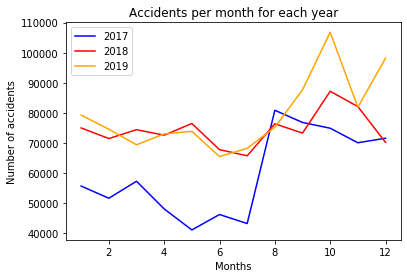

In [94]:
#Plot will show distribution of accidents for each year
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]
month = [12]
#Plotting the number of accidents per month for each year
#plt.plot(month, accidents_per_month_2016['Start_Date_Only'], color="green", label="2016")
plt.plot(months, accidents_per_month_2017['Start_Date_Only'], color="blue", label="2017")
plt.plot(months, accidents_per_month_2018['Start_Date_Only'], color="red", label="2018")
plt.plot(months, accidents_per_month_2019['Start_Date_Only'], color="orange", label="2019")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for each year")
plt.xlabel("Months")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()


In [100]:
#Creating df for California and NY to evaluate the number of accidents for each month in each year
#California
accidents_CA_2016_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2016)].sort_values(by='Start_Month', ascending=True)
accidents_CA_2017_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2017)].sort_values(by='Start_Month', ascending=True)
accidents_CA_2018_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2018)].sort_values(by='Start_Month', ascending=True)
accidents_CA_2019_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2019)].sort_values(by='Start_Month', ascending=True)

accidents_CA_2019_df.head()

#New York
accidents_NY_2016_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2016)].sort_values(by='Start_Month', ascending=True)
accidents_NY_2017_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2017)].sort_values(by='Start_Month', ascending=True)
accidents_NY_2018_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2018)].sort_values(by='Start_Month', ascending=True)
accidents_NY_2019_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2019)].sort_values(by='Start_Month', ascending=True)

accidents_NY_2019_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
958857,2,2019-01-29 11:37:18,2019-01-29 12:06:57,41.297817,-73.935936,Cortlandt Manor,NY,10567-7300,33.1,24.9,...,ESE,10.4,0.0,Overcast,Day,2019,Winter,1,2019-01-29,11
952177,2,2019-01-25 04:56:00,2019-01-25 05:25:20,40.752480,-73.852135,Corona,NY,11368,35.1,25.9,...,WNW,13.8,NaN,Mostly Cloudy,Night,2019,Winter,1,2019-01-25,4
952180,2,2019-01-25 05:52:23,2019-01-25 06:22:15,40.692070,-73.765289,Saint Albans,NY,11412-4025,34.0,26.0,...,West,10.4,NaN,Mostly Cloudy,Night,2019,Winter,1,2019-01-25,5
952181,2,2019-01-25 05:52:47,2019-01-25 06:22:30,41.054260,-73.809792,Elmsford,NY,10523,32.0,24.8,...,West,8.1,NaN,Mostly Cloudy,Night,2019,Winter,1,2019-01-25,5
952182,2,2019-01-25 05:58:20,2019-01-25 06:28:05,40.750229,-73.855141,Corona,NY,11368-2634,35.1,29.3,...,West,6.9,NaN,Overcast,Night,2019,Winter,1,2019-01-25,5


In [102]:
#Grouping by month for California and counting accidents
accidents_per_month_2016_CA = accidents_CA_2016_df.groupby(accidents_CA_2016_df['Start_Month']).count()
accidents_per_month_2017_CA = accidents_CA_2017_df.groupby(accidents_CA_2017_df['Start_Month']).count()
accidents_per_month_2018_CA = accidents_CA_2018_df.groupby(accidents_CA_2018_df['Start_Month']).count()
accidents_per_month_2019_CA = accidents_CA_2019_df.groupby(accidents_CA_2019_df['Start_Month']).count()
accidents_per_month_2019_CA

#Grouping by month for NY and counting accidents
accidents_per_month_2016_NY = accidents_NY_2016_df.groupby(accidents_NY_2016_df['Start_Month']).count()
accidents_per_month_2017_NY = accidents_NY_2017_df.groupby(accidents_NY_2017_df['Start_Month']).count()
accidents_per_month_2018_NY = accidents_NY_2018_df.groupby(accidents_NY_2018_df['Start_Month']).count()
accidents_per_month_2019_NY = accidents_NY_2019_df.groupby(accidents_NY_2019_df['Start_Month']).count()
accidents_per_month_2019_NY

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Date_Only,Hour
Start_Month,,,,,,,,,,,,,,,,,,,,,
1,3510,3510,3510,3510,3510,3510,3510,3510,3502,3010,...,3503,3508,3140,944,3507,3510,3510,3510,3510,3510
2,3796,3796,3796,3796,3796,3796,3796,3796,3792,3089,...,3766,3796,3299,1105,3794,3796,3796,3796,3796,3796
3,3354,3354,3354,3354,3354,3354,3354,3354,3349,2294,...,3348,3350,2888,691,3347,3354,3354,3354,3354,3354
4,3776,3776,3776,3776,3776,3776,3776,3776,3757,3699,...,3771,3716,3716,3775,3771,3776,3776,3776,3776,3776
5,4262,4262,4262,4262,4262,4262,4262,4262,4256,4204,...,4251,4204,4204,4259,4253,4262,4262,4262,4262,4262
6,3914,3914,3914,3914,3914,3914,3914,3914,3910,3873,...,3906,3876,3876,3914,3907,3914,3914,3914,3914,3914
7,3615,3615,3615,3615,3615,3615,3615,3615,3588,3565,...,3581,3567,3567,3587,3581,3615,3615,3615,3615,3615
8,3327,3327,3327,3327,3327,3327,3327,3327,3289,3265,...,3301,3276,3276,3302,3301,3327,3327,3327,3327,3327
9,3282,3282,3282,3282,3282,3282,3282,3282,3270,3251,...,3266,3251,3251,3277,3266,3282,3282,3282,3282,3282


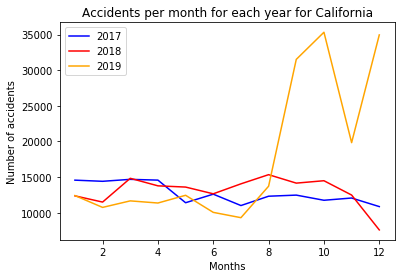

In [103]:
#Plot will show distribution of accidents for each year in California
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]
month = [12]
#Plotting the number of accidents per month for each year
#plt.plot(month, accidents_per_month_2016['Start_Date_Only'], color="green", label="2016")
plt.plot(months, accidents_per_month_2017_CA['Start_Date_Only'], color="blue", label="2017")
plt.plot(months, accidents_per_month_2018_CA['Start_Date_Only'], color="red", label="2018")
plt.plot(months, accidents_per_month_2019_CA['Start_Date_Only'], color="orange", label="2019")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for each year for California")
plt.xlabel("Months")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

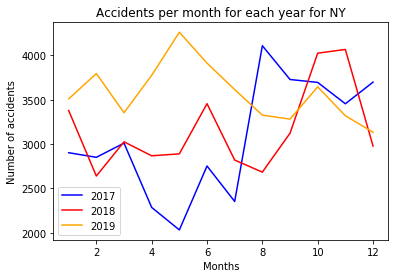

In [157]:
#Plot will show distribution of accidents for each year in New York
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]
month = [12]
#Plotting the number of accidents per month for each year
#plt.plot(month, accidents_per_month_2016['Start_Date_Only'], color="green", label="2016")
plt.plot(months, accidents_per_month_2017_NY['Start_Date_Only'], color="blue", label="2017")
plt.plot(months, accidents_per_month_2018_NY['Start_Date_Only'], color="red", label="2018")
plt.plot(months, accidents_per_month_2019_NY['Start_Date_Only'], color="orange", label="2019")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for each year for NY")
plt.xlabel("Months")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

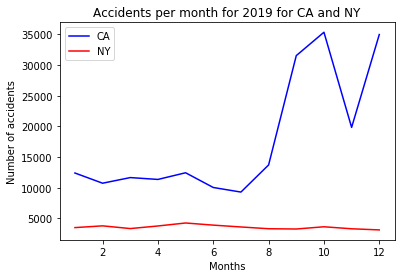

In [159]:
#Plot will show distribution of accidents for California and for New York in the year 2019
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]

#Plotting the number of accidents per month for California in 2019
plt.plot(months, accidents_per_month_2019_CA['Start_Date_Only'], color="blue", label="CA")

#Plotting the number of accidents per month for New York in 2018
plt.plot(months, accidents_per_month_2019_NY['Start_Date_Only'], color="red", label="NY")



# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for 2019 for CA and NY")
plt.xlabel("Months")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

In [106]:
#Calling the initial data and creating a new column for hour
accident_target["Hour"]=accident_target["Start_Time"].dt.hour
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,...,Calm,NaN,NaN,NaN,Night,2016,Winter,12,2016-12-01,0
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,...,WSW,3.5,NaN,Clear,Night,2016,Winter,12,2016-12-01,1
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,...,ESE,5.8,NaN,Mostly Cloudy,Night,2016,Winter,12,2016-12-01,1
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,...,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01,1
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,...,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01,1


In [108]:
#Grouping by hour and counting accidents for the whole dataset
accidents_per_hour = accident_target.groupby(accident_target['Hour']).count()
accidents_per_hour.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
Hour,,,,,,,,,,,,,,,,,,,,,
0,19440,19440,19440,19440,19440,19440,19440,19412,18873,8859,...,18891,18988,14764,7860,18876,19434,19440,19440,19440,19440
1,15085,15085,15085,15085,15085,15084,15085,15070,14695,6695,...,14731,14797,11180,5783,14744,15084,15085,15085,15085,15085
2,16171,16171,16171,16171,16171,16171,16171,16159,15743,7099,...,15789,15863,11892,5941,15782,16171,16171,16171,16171,16171
3,15690,15690,15690,15690,15690,15690,15690,15677,15320,6838,...,15352,15439,11623,5761,15347,15690,15690,15690,15690,15690
4,49109,49109,49109,49109,49109,49105,49109,49096,48019,23365,...,47884,48258,37967,19940,47866,49105,49109,49109,49109,49109


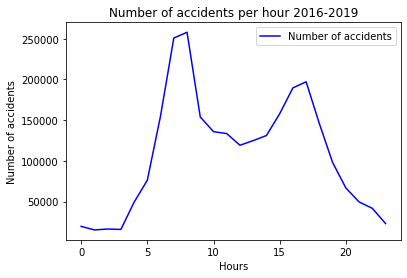

In [123]:
#Plot will show distribution of accidents throughout the hours of the day for the whole dataset
#List of hours
months = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#Plotting the number of accidents per hour
plt.plot(months, accidents_per_hour['Start_Date_Only'], color="blue", label="Number of accidents")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of accidents per hour 2016-2019")
plt.xlabel("Hours")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

In [113]:
#Cresting the Dataframe with the whole data for CA, NY
accidents_CA = accident_target.loc[accident_target['State']=='CA']
accidents_NY = accident_target.loc[accident_target['State']=='NY']

In [114]:
#Grouping by month for California and counting accidents
accidents_per_hour_CA = accidents_CA.groupby(accidents_CA['Hour']).count()

#Grouping by month for NY and counting accidents
accidents_per_hour_NY = accidents_NY.groupby(accidents_NY['Hour']).count()


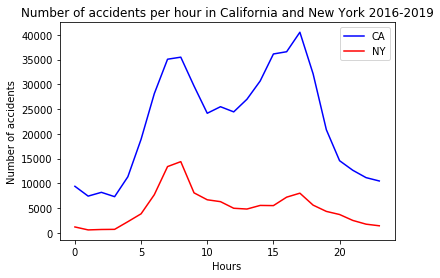

In [122]:
#Plot will show distribution of accidents throughout the hours of the day for California and New York
#List of hours
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#Plotting the number of accidents per hour in California
plt.plot(hours, accidents_per_hour_CA['Start_Date_Only'], color="blue", label="CA")

#Plotting the number of accidents per hour in New York
plt.plot(hours, accidents_per_hour_NY['Start_Date_Only'], color="red", label="NY")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of accidents per hour in California and New York 2016-2019")
plt.xlabel("Hours")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

In [118]:
#Grouping by month for California and counting accidents
accidents_per_hour_2016_CA = accidents_CA_2016_df.groupby(accidents_CA_2016_df['Hour']).count()
accidents_per_hour_2017_CA = accidents_CA_2017_df.groupby(accidents_CA_2017_df['Hour']).count()
accidents_per_hour_2018_CA = accidents_CA_2018_df.groupby(accidents_CA_2018_df['Hour']).count()
accidents_per_hour_2019_CA = accidents_CA_2019_df.groupby(accidents_CA_2019_df['Hour']).count()
accidents_per_hour_2019_CA

#Grouping by month for NY and counting accidents
accidents_per_hour_2016_NY = accidents_NY_2016_df.groupby(accidents_NY_2016_df['Hour']).count()
accidents_per_hour_2017_NY = accidents_NY_2017_df.groupby(accidents_NY_2017_df['Hour']).count()
accidents_per_hour_2018_NY = accidents_NY_2018_df.groupby(accidents_NY_2018_df['Hour']).count()
accidents_per_hour_2019_NY = accidents_NY_2019_df.groupby(accidents_NY_2019_df['Hour']).count()
accidents_per_hour_2019_NY.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
Hour,,,,,,,,,,,,,,,,,,,,,
0,481,481,481,481,481,481,481,481,478,451,...,478,473,461,432,478,481,481,481,481,481
1,170,170,170,170,170,170,170,170,170,157,...,169,170,160,145,169,170,170,170,170,170
2,214,214,214,214,214,214,214,214,214,198,...,214,212,199,166,214,214,214,214,214,214
3,191,191,191,191,191,191,191,191,190,180,...,190,189,185,164,191,191,191,191,191,191
4,877,877,877,877,877,877,877,877,875,823,...,874,876,834,712,874,877,877,877,877,877


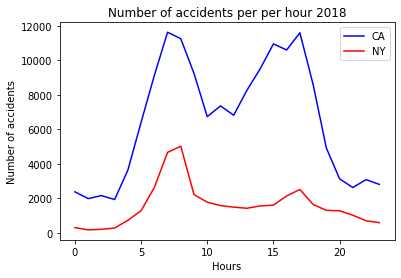

In [120]:
#Plot will show distribution of accidents throughout the hours of the day for California and New York in 2018
#List of hours
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#Plotting the number of accidents per hour in California
plt.plot(hours, accidents_per_hour_2018_CA['Start_Date_Only'], color="blue", label="CA")

#Plotting the number of accidents per hour in New York
plt.plot(hours, accidents_per_hour_2018_NY['Start_Date_Only'], color="red", label="NY")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of accidents per per hour 2018")
plt.xlabel("Hours")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

# Weather Conditions

In [130]:
accident_target.count()

Severity             2623302
Start_Time           2623302
End_Time             2623302
Start_Lat            2623302
Start_Lng            2623302
City                 2623244
State                2623302
Zipcode              2622516
Temperature(F)       2572734
Wind_Chill(F)        1104925
Humidity(%)          2570090
Pressure(in)         2579648
Visibility(mi)       2564745
Wind_Direction       2581129
Wind_Speed(mph)      2248405
Precipitation(in)     947119
Weather_Condition    2564660
Sunrise_Sunset       2623235
Start_Year           2623302
Season               2623302
Start_Month          2623302
Start_Date_Only      2623302
Hour                 2623302
dtype: int64

In [150]:
#Grouping by weather condition and counting each condition
accidents_per_weather_condition = accident_target.groupby(accident_target['Weather_Condition']).count()
accidents_per_weather_condition_df = accidents_per_weather_condition.reset_index()
accidents_per_weather_condition_df.sort_values(by= 'Severity', ascending=False).head(30)

,Weather_Condition,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
4,Clear,652972,652972,652972,652972,652972,652956,652972,652972,650830,...,650820,652963,499200,4053,652956,652972,652972,652972,652972,652972
71,Mostly Cloudy,366359,366359,366359,366359,366359,366354,366359,366359,365412,...,365913,365852,333013,114546,366353,366359,366359,366359,366359,366359
74,Overcast,340627,340627,340627,340627,340627,340624,340627,340627,339661,...,339188,340624,289642,49026,340624,340627,340627,340627,340627,340627
11,Fair,333090,333090,333090,333090,333090,333084,333090,333090,331665,...,332407,330175,330187,317163,333082,333090,333090,333090,333090,333090
77,Partly Cloudy,257764,257764,257764,257764,257764,257762,257764,257764,257050,...,257379,257046,234058,85317,257762,257764,257764,257764,257764,257764
87,Scattered Clouds,168328,168328,168328,168328,168328,168323,168328,168328,167796,...,168096,168327,145168,3835,168323,168328,168328,168328,168328,168328
51,Light Rain,129810,129810,129810,129810,129810,129803,129810,129810,129406,...,129648,129661,119426,119005,129803,129810,129810,129810,129810,129810
5,Cloudy,115152,115152,115152,115152,115152,115148,115152,115152,114747,...,114872,114473,114473,111261,115148,115152,115152,115152,115152,115152
58,Light Snow,41598,41598,41598,41598,41598,41596,41598,41598,41572,...,41562,41526,38595,35219,41596,41598,41598,41598,41598,41598
80,Rain,30508,30508,30508,30508,30508,30508,30508,30508,30322,...,30431,30461,27790,25442,30508,30508,30508,30508,30508,30508


In [152]:
#Removing Values with little occurance
accidents_per_weather_condition_clean = accidents_per_weather_condition_df.loc[accidents_per_weather_condition_df["Severity"]>=5000]
accidents_per_weather_condition_clean

,Weather_Condition,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
4,Clear,652972,652972,652972,652972,652972,652956,652972,652972,650830,...,650820,652963,499200,4053,652956,652972,652972,652972,652972,652972
5,Cloudy,115152,115152,115152,115152,115152,115148,115152,115152,114747,...,114872,114473,114473,111261,115148,115152,115152,115152,115152,115152
11,Fair,333090,333090,333090,333090,333090,333084,333090,333090,331665,...,332407,330175,330187,317163,333082,333090,333090,333090,333090,333090
13,Fog,21161,21161,21161,21161,21161,21161,21161,21161,21002,...,21135,21121,15958,10697,21161,21161,21161,21161,21161,21161
19,Haze,30427,30427,30427,30427,30427,30426,30427,30427,30154,...,30424,30380,23117,7283,30426,30427,30427,30427,30427,30427
26,Heavy Rain,11249,11249,11249,11249,11249,11248,11249,11249,11186,...,11224,11229,10528,10366,11248,11249,11249,11249,11249,11249
41,Light Drizzle,9795,9795,9795,9795,9795,9793,9795,9795,9777,...,9785,9791,8770,7623,9793,9795,9795,9795,9795,9795
51,Light Rain,129810,129810,129810,129810,129810,129803,129810,129810,129406,...,129648,129661,119426,119005,129803,129810,129810,129810,129810,129810
58,Light Snow,41598,41598,41598,41598,41598,41596,41598,41598,41572,...,41562,41526,38595,35219,41596,41598,41598,41598,41598,41598
71,Mostly Cloudy,366359,366359,366359,366359,366359,366354,366359,366359,365412,...,365913,365852,333013,114546,366353,366359,366359,366359,366359,366359


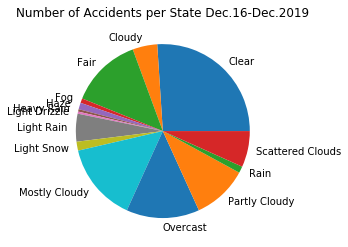

In [155]:
#Presenting the number of accidents per state in a pie chart.
plt.title("Number of Accidents per State Dec.16-Dec.2019")
#explode = (0.1)
plt.pie(accidents_per_weather_condition_clean["Severity"],labels= accidents_per_weather_condition_clean['Weather_Condition'])
plt.show()

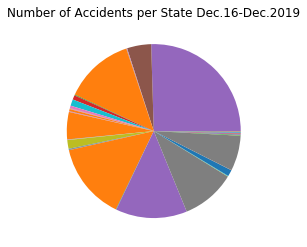

In [145]:
#Presenting the number of accidents per state in a pie chart.
plt.title("Number of Accidents per State Dec.16-Dec.2019")
#explode = (0.1)
plt.pie(accidents_per_weather_condition_df["Severity"])
plt.show()


#Conditional Lables in pie chart from stack overflow
for ax, col in zip(axes.flat, df.columns):                                                             
    data = df[col]                                                                                     
    labels = [n if v > data.sum() * 0.2 else ''
              for n, v in zip(df.index, data)]                       

    ax.pie(data, autopct=my_autopct, colors=colors, labels=labels)